[View in Colaboratory](https://colab.research.google.com/github/DJCordhose/data-viz/blob/master/notebooks/5-2-t-sne.ipynb)

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
%matplotlib inline

In [0]:
import numpy as np
from sklearn.manifold import TSNE

In [0]:
# X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2], [4, 3], [4, -1]])
# X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2], [4, 3], [0, 0]])
X = np.array([[-1, 1], [-2, 2], [-3, 3], [1, 1], [2, 2], [3, 3], [4, 4]])

In [5]:
X

array([[-1,  1],
       [-2,  2],
       [-3,  3],
       [ 1,  1],
       [ 2,  2],
       [ 3,  3],
       [ 4,  4]])

In [0]:
import matplotlib.pyplot as plt

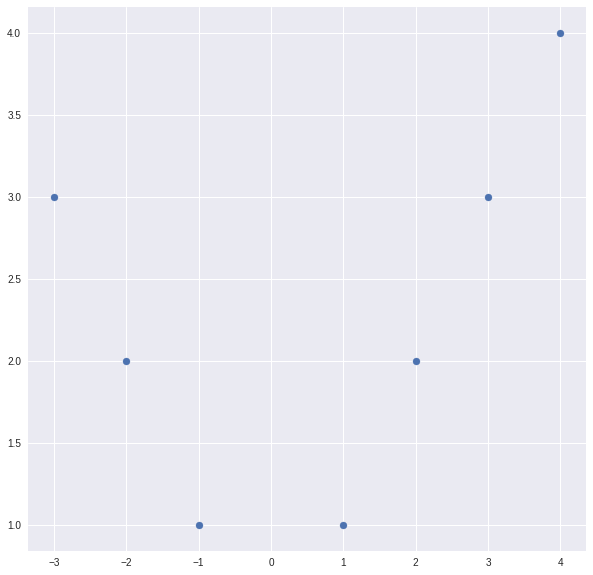

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1])
# plt.savefig('original.png')

In [0]:
tsne = TSNE(n_components=2)

In [9]:
# you can only transform on what you fit, different from pca
X_transformed = tsne.fit_transform(X)
X_transformed

array([[  29.230133,  -68.16061 ],
       [ -25.680252,  106.52406 ],
       [ 153.05554 ,   66.74282 ],
       [ 207.96964 , -107.93928 ],
       [  84.14711 , -242.84154 ],
       [ -94.59419 , -203.06061 ],
       [-149.5056  ,  -28.37454 ]], dtype=float32)

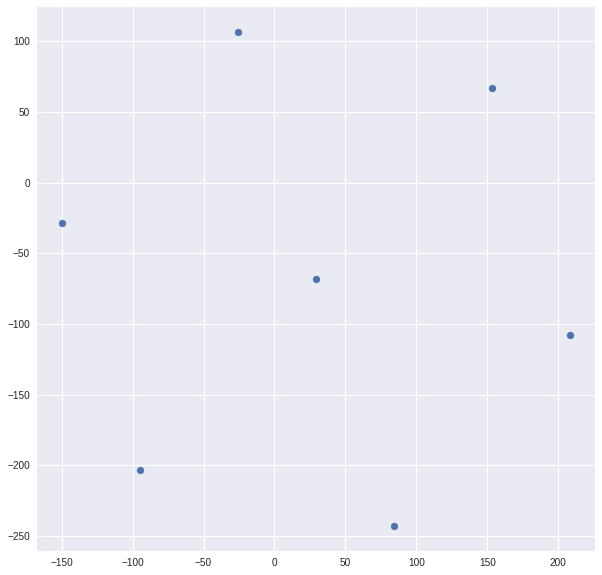

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])
# plt.savefig('reduced.png')

In [0]:
tsne = TSNE(n_components=1)

In [0]:
# you can only transform on what you fit, different from pca
X_transformed = tsne.fit_transform(X)

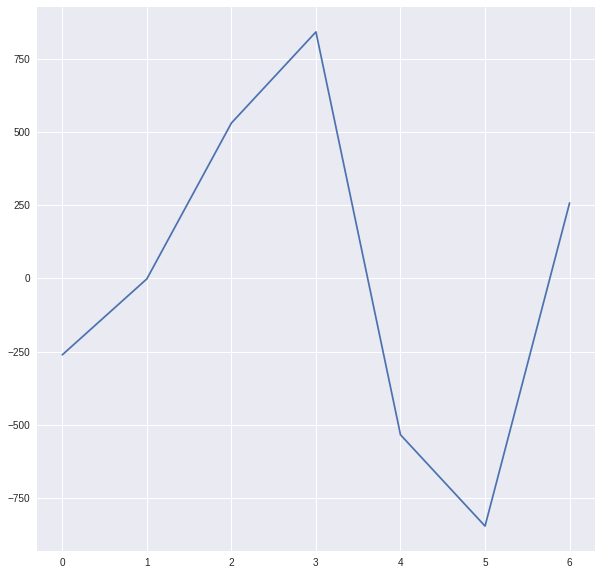

In [13]:
plt.figure(figsize=(10,10))
plt.plot(X_transformed)

### Maybe we get better results on actual clusters

In [0]:
from sklearn.datasets.samples_generator import make_blobs
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=42)

In [15]:
X

array([[ 0.71263709, -0.64203025],
       [ 0.86291419,  0.67908909],
       [-0.37379039, -1.0263001 ],
       ...,
       [ 1.45712913,  1.30077321],
       [ 1.86127298,  0.69306097],
       [ 1.27278119,  0.8758933 ]])

In [0]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

def plot_dataset(X, y_pred=[0], fname=None):
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # last color is black to properly display label -1 as noise (black)
    colors = np.append(np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1)))), ['#000000'])
    plt.figure(figsize=(10, 10))

    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.xticks(())
    plt.yticks(())
    if fname:
        plt.savefig(fname)


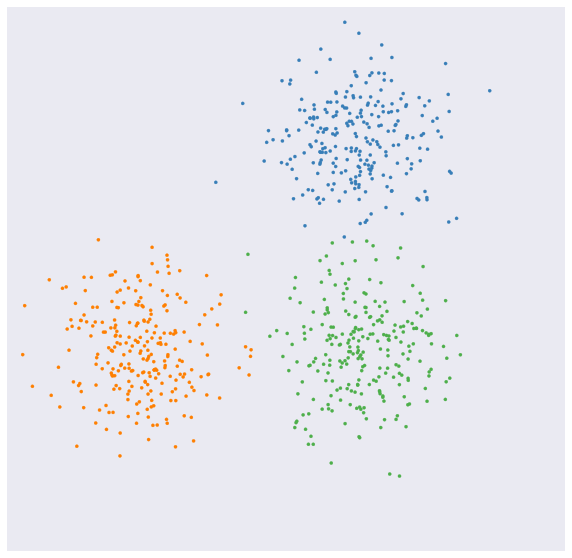

In [17]:
plot_dataset(X, labels_true)

In [0]:
# TSNE?

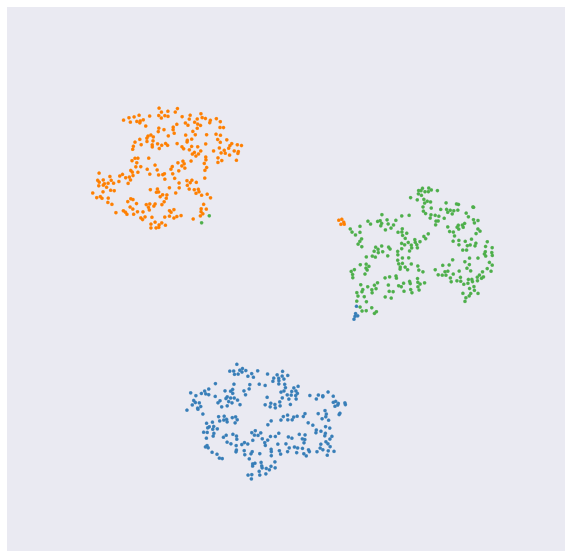

In [19]:
tsne = TSNE(n_components=2)
X_transformed = tsne.fit_transform(X)
plot_dataset(X_transformed, labels_true)

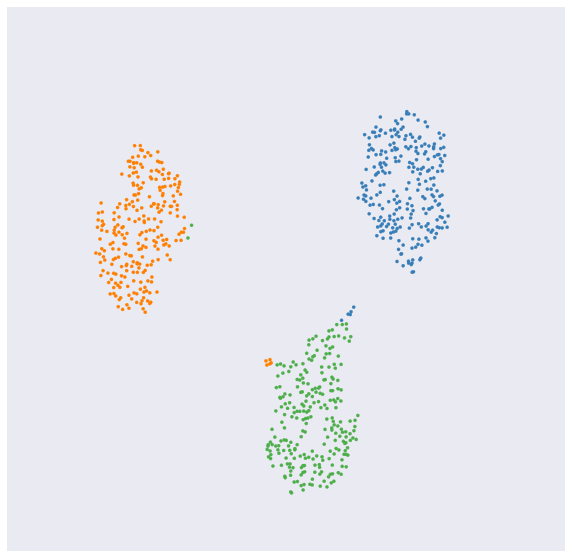

In [20]:
tsne = TSNE(n_components=2, perplexity=50)
X_transformed = tsne.fit_transform(X)
plot_dataset(X_transformed, labels_true)

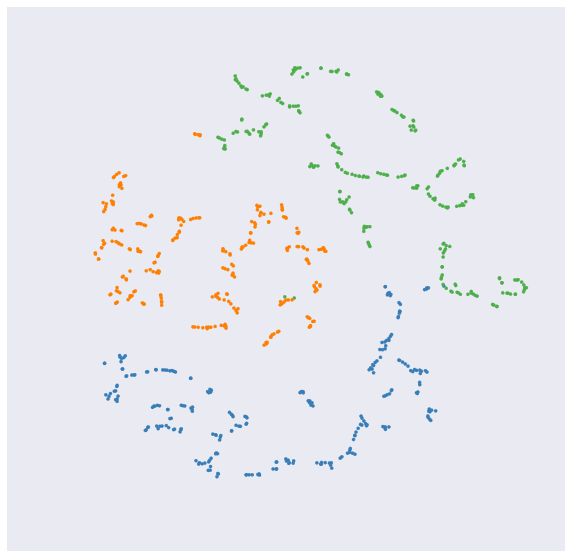

In [21]:
tsne = TSNE(n_components=2, perplexity=5)
X_transformed = tsne.fit_transform(X)
plot_dataset(X_transformed, labels_true)